## Module imports and global settings

In [3]:
import pandas as pd
import numpy as np
#import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

#settings
pd.set_option('float_format', '{:f}'.format)

In [4]:
calendar = pd.read_csv('D:/disertation/project/vienna_data/raw/calendar_17_03_2020.csv')

In [5]:
print(f"Setul de date inițial conține {len(calendar)} rânduri")
calendar.head()

Setul de date inițial conține 4826810 rânduri


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,457863,2020-03-17,f,$70.00,$70.00,1.000000,14.000000
1,222614,2020-03-17,f,$60.00,$60.00,2.000000,21.000000
2,222614,2020-03-18,t,$60.00,$60.00,2.000000,21.000000
3,222614,2020-03-19,t,$60.00,$60.00,2.000000,21.000000
4,222614,2020-03-20,t,$60.00,$60.00,2.000000,21.000000


In [6]:
calendar.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4826805,42926580,2021-03-12,f,$30.00,$30.00,13.000000,1125.000000
4826806,42926580,2021-03-13,f,$30.00,$30.00,13.000000,1125.000000
4826807,42926580,2021-03-14,f,$30.00,$30.00,13.000000,1125.000000
4826808,42926580,2021-03-15,f,$30.00,$30.00,13.000000,1125.000000
4826809,42926580,2021-03-16,f,$30.00,$30.00,13.000000,1125.000000


In [7]:
calendar.shape

(4826810, 7)

In [8]:
calendar.isna().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    2
maximum_nights    2
dtype: int64

In [9]:
# drop minimum and maximum nights columns
calendar.drop(['minimum_nights', 'maximum_nights'], axis = 1, inplace = True)

## Price column manipulation

The price column will be modified the same way as it was for the listings dataset, for consistent conclusions.

In [10]:
# remove $ and convert to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)
calendar.head()

,listing_id,date,available,price,adjusted_price
0,457863,2020-03-17,f,70.000000,70.000000
1,222614,2020-03-17,f,60.000000,60.000000
2,222614,2020-03-18,t,60.000000,60.000000
3,222614,2020-03-19,t,60.000000,60.000000
4,222614,2020-03-20,t,60.000000,60.000000


In [11]:
calendar.describe(include = 'float')

,price,adjusted_price
count,4826810.000000,4826810.000000
mean,87.368674,87.339306
std,248.600378,248.734134
min,9.000000,9.000000
25%,40.000000,40.000000
50%,60.000000,60.000000
75%,90.000000,90.000000
max,18837.000000,18837.000000


In [15]:
### weighted average
np.average(calendar.price, weights = calendar.listing_id)

87.82926932838603

In [27]:
print("Minimum price:", calendar['price'].min())
print("Q1:",calendar['price'].quantile(0.25))
print("Median price:",calendar['price'].median())
print("Q3:",calendar['price'].quantile(0.75))
print("Mean price:",round(calendar['price'].mean(),2))
print("Maximum price:",calendar['price'].max())

#Max treshold = Q3 + 3*IQR
price_max_tresh = calendar['price'].quantile(0.75) + 3*(calendar['price'].quantile(0.75)-calendar['price'].quantile(0.25))
print("Max treshold:", price_max_tresh)
print(f"{round((price_max_tresh/round(len(calendar)/365,0))*100,1)}% of listings exceed the max treshold")

Minimum price: 9.0
Q1: 40.0
Median price: 60.0
Q3: 90.0
Mean price: 87.37
Maximum price: 18837.0
Max treshold: 240.0
1.8% of listings exceed the max treshold


In [12]:
#dropping adjusted_price
calendar.drop('adjusted_price', axis = 1, inplace = True)

In [13]:
calendar.head()

,listing_id,date,available,price
0,457863,2020-03-17,f,70.000000
1,222614,2020-03-17,f,60.000000
2,222614,2020-03-18,t,60.000000
3,222614,2020-03-19,t,60.000000
4,222614,2020-03-20,t,60.000000


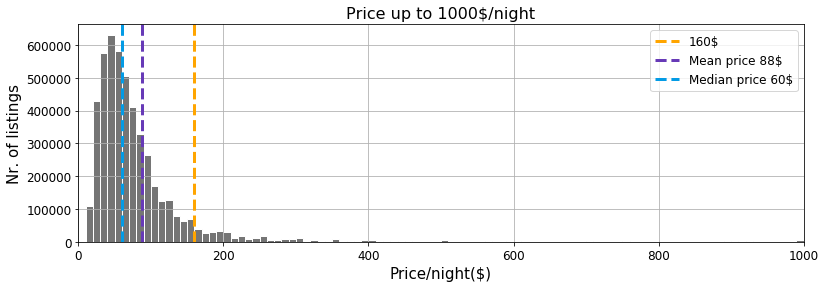

In [17]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(13,4))

calendar.price.hist(bins=100, range=(0,1000), ec='White', color = "#757575")

plt.margins(x=0)
plt.axvline(160, color='orange', linestyle='--', label = "160$", lw=3)
plt.axvline(calendar['price'].mean(), color='#673ab7', linestyle='--', label="Mean price 88$", lw=3)
plt.axvline(calendar['price'].median(), color='#039be5', linestyle='--', label = "Median price 60$", lw=3)

plt.title("Price up to 1000$/night", fontsize=16)
plt.xlabel("Price/night($)", fontsize = 15)
plt.ylabel("Nr. of listings", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.legend(loc='upper right', fontsize = 12)

plt.show()

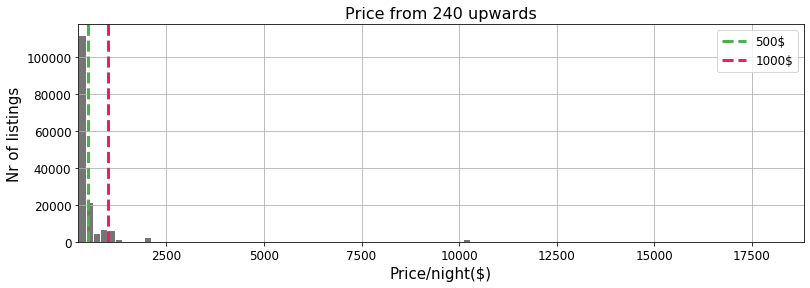

In [18]:
# Distribution of prices from $240 upwards
plt.figure(figsize=(13,4))

calendar.price.hist(bins=100, range=(240, max(calendar.price)), ec='White', color = "#757575")

plt.margins(x=0)
plt.axvline(500, color='#4caf50', linestyle='--', label = "500$", lw=3)
plt.axvline(1000, color='#e91e63', linestyle='--', label = "1000$", lw=3)

plt.title("Price from 240 upwards", fontsize=16)
plt.xlabel("Price/night($)", fontsize = 15)
plt.ylabel("Nr of listings", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc='upper right', fontsize = 12)
plt.show()

In [28]:
# Replacing values under £15 with £15
calendar.loc[calendar.price <= 15, 'price'] = 15

# Replacing values over £240 with £240
calendar.loc[calendar.price >= 240, 'price'] = 240

In [29]:
calendar.describe(include = 'float')

,price
count,4826810.000000
mean,74.673628
std,50.260775
min,15.000000
25%,40.000000
50%,60.000000
75%,90.000000
max,240.000000


## Adding columns to the dataframe

In [30]:
calendar[['Year', 'Month','Day']] = calendar['date'].str.split('-',2, expand = True)

In [31]:
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

In [32]:
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
calendar['WeekDayNr'] = calendar['date'].dt.dayofweek
calendar['WeekDay'] = calendar['date'].dt.day_name()

In [33]:
calendar.head()

,listing_id,date,available,price,Year,Month,Day,WeekDayNr,WeekDay
0,457863,2020-03-17,f,70.000000,2020,03,17,1,Tuesday
1,222614,2020-03-17,f,60.000000,2020,03,17,1,Tuesday
2,222614,2020-03-18,t,60.000000,2020,03,18,2,Wednesday
3,222614,2020-03-19,t,60.000000,2020,03,19,3,Thursday
4,222614,2020-03-20,t,60.000000,2020,03,20,4,Friday


In [34]:
# Assign Season to every entry
lookup = {
    '01': 'Winter',
    '02': 'Spring',
    '03': 'Spring',
    '04': 'Spring',
    '05': 'Summer',
    '06': 'Summer',
    '07': 'Summer',
    '08': 'Autumn',
    '09': 'Autumn',
    '10': 'Autumn',
    '11': 'Winter',
    '12': 'Winter'
}
calendar['Season'] = calendar['Month'].apply(lambda x: lookup[x])

lookupNum = {
    '01': 4,
    '02': 1,
    '03': 1,
    '04': 1,
    '05': 2,
    '06': 2,
    '07': 2,
    '08': 3,
    '09': 3,
    '10': 3,
    '11': 4,
    '12': 4
}

calendar['Season_num'] = calendar['Month'].apply(lambda x: lookupNum[x])

In [35]:
calendar.head()

,listing_id,date,available,price,Year,Month,Day,WeekDayNr,WeekDay,Season,Season_num
0,457863,2020-03-17,f,70.000000,2020,03,17,1,Tuesday,Spring,1
1,222614,2020-03-17,f,60.000000,2020,03,17,1,Tuesday,Spring,1
2,222614,2020-03-18,t,60.000000,2020,03,18,2,Wednesday,Spring,1
3,222614,2020-03-19,t,60.000000,2020,03,19,3,Thursday,Spring,1
4,222614,2020-03-20,t,60.000000,2020,03,20,4,Friday,Spring,1


In [36]:
# Average price by season
calendar.groupby(['Season']).price.mean()

Season
Autumn   75.666435
Spring   71.839894
Summer   75.149563
Winter   75.946332
Name: price, dtype: float64

In [37]:
#avg price per month
print(calendar.groupby(['Month']).price.mean())

Month
01   74.876608
02   73.599346
03   70.739682
04   71.334763
05   75.020303
06   74.800055
07   75.617055
08   75.645054
09   76.098689
10   75.269505
11   73.718000
12   79.172506
Name: price, dtype: float64


In [38]:
# Average price by Day
print(calendar.groupby(['WeekDay']).price.mean())

WeekDay
Friday      76.455393
Monday      73.839392
Saturday    76.459654
Sunday      74.021620
Thursday    74.311860
Tuesday     73.773773
Wednesday   73.870445
Name: price, dtype: float64


## holidays

In [39]:
#Analysis of avg. price during holidays
holidaysAUT = holidays.AUT(state = 'W')

calendar['IsHoliday'] = calendar['date'].isin(holidaysAUT)
calendar['Holiday Name'] = calendar['date'].apply(lambda x: holidaysAUT.get(x))

In [40]:
calendar['Holiday Name'].value_counts(dropna = False)

NaN                    4654898
Neujahr                  13224
Mariä Empfängnis         13224
Allerheiligen            13224
Fronleichnam             13224
Christi Himmelfahrt      13224
Christtag                13224
Heilige Drei Könige      13224
Mariä Himmelfahrt        13224
Staatsfeiertag           13224
Nationalfeiertag         13224
Ostermontag              13224
Stefanitag               13224
Pfingstmontag            13224
Name: Holiday Name, dtype: int64

In [41]:
lookupHoliday = {
    'Ostermontag': 'Easter Monday',
    'Nationalfeiertag': 'National Day',
    'Allerheiligen': 'All Saints Day',
    'Pfingstmontag': 'Pentecost',
    'Christi Himmelfahrt': 'Ascension of Jesus',
    'Fronleichnam': 'Corpus Christi',
    'Mariä Empfängnis': 'Immaculate Conception',
    'Mariä Himmelfahrt': 'Assumption of the Virgin Mary',
    'Heilige Drei Könige': 'Epiphany',
    'Staatsfeiertag': 'National Holiday(1st of May)',
    'Christtag':'Christmas Day',
    'Stefanitag': 'St. Stephen Day',
    'Neujahr': 'New Year Day'
}
calendar['Holiday Name'] = calendar['Holiday Name'].map(lookupHoliday)

In [42]:
calendar['Holiday Name'].value_counts(dropna = False)

NaN                              4654898
National Holiday(1st of May)       13224
Easter Monday                      13224
Assumption of the Virgin Mary      13224
Immaculate Conception              13224
St. Stephen Day                    13224
Corpus Christi                     13224
New Year Day                       13224
National Day                       13224
Epiphany                           13224
All Saints Day                     13224
Pentecost                          13224
Christmas Day                      13224
Ascension of Jesus                 13224
Name: Holiday Name, dtype: int64

In [43]:
calendar.loc[calendar['Holiday Name'].isna(), 'IsHoliday'] = 0

In [44]:
calendar.loc[calendar['Holiday Name'].notna(), 'IsHoliday'] = 1

In [45]:
calendar.loc[calendar['Holiday Name'].isna(), 'Holiday Name'] = 'No Holiday'

In [46]:
calendar[calendar['IsHoliday']==1].head()

,listing_id,date,available,price,Year,Month,Day,WeekDayNr,WeekDay,Season,Season_num,IsHoliday,Holiday Name
28,222614,2020-04-13,t,66.000000,2020,04,13,0,Monday,Spring,1,1,Easter Monday
46,222614,2020-05-01,t,64.000000,2020,05,01,4,Friday,Summer,2,1,National Holiday(1st of May)
82,457863,2020-04-13,t,70.000000,2020,04,13,0,Monday,Spring,1,1,Easter Monday
114,15883,2020-04-13,t,110.000000,2020,04,13,0,Monday,Spring,1,1,Easter Monday
140,457863,2020-05-01,t,70.000000,2020,05,01,4,Friday,Summer,2,1,National Holiday(1st of May)


In [47]:
calendar[calendar['IsHoliday']==0].head()

,listing_id,date,available,price,Year,Month,Day,WeekDayNr,WeekDay,Season,Season_num,IsHoliday,Holiday Name
0,457863,2020-03-17,f,70.000000,2020,03,17,1,Tuesday,Spring,1,0,No Holiday
1,222614,2020-03-17,f,60.000000,2020,03,17,1,Tuesday,Spring,1,0,No Holiday
2,222614,2020-03-18,t,60.000000,2020,03,18,2,Wednesday,Spring,1,0,No Holiday
3,222614,2020-03-19,t,60.000000,2020,03,19,3,Thursday,Spring,1,0,No Holiday
4,222614,2020-03-20,t,60.000000,2020,03,20,4,Friday,Spring,1,0,No Holiday


In [48]:
calendar.isna().sum()

listing_id      0
date            0
available       0
price           0
Year            0
Month           0
Day             0
WeekDayNr       0
WeekDay         0
Season          0
Season_num      0
IsHoliday       0
Holiday Name    0
dtype: int64

In [50]:
#exporting the dataframe
calendar.to_csv(r'D:/disertation/project/vienna_data/transformed_calendar.csv')